# Wormhole visualizer

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import ipywidgets
%matplotlib ipympl

from matplotlib import cm
from matplotlib.ticker import LinearLocator

C:\Users\sylvi\AppData\Local\Temp\ipykernel_82584\429464241.py:3: RuntimeWarning: invalid value encountered in sqrt
  f = np.sqrt( 1/(1+np.exp(-abs(r))) - 0.5 - 0.2 )*3.5


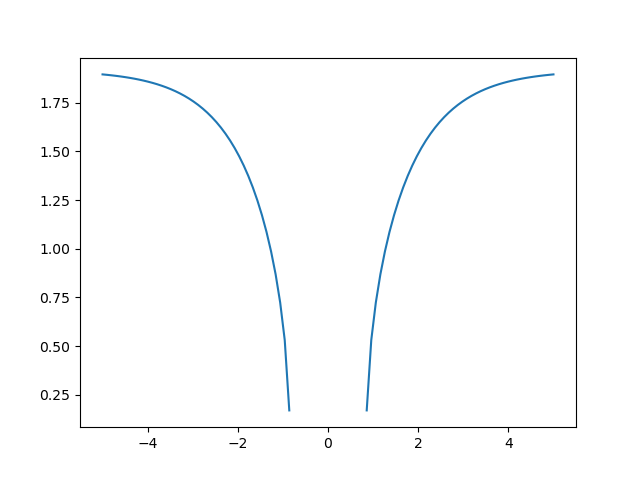

In [3]:
plt.figure()
r = np.linspace(-5,5,100)
f = np.sqrt( 1/(1+np.exp(-abs(r))) - 0.5 - 0.2 )*3.5
plt.plot(r, f)

In [34]:
def simulate(first, second, res, holeW, vertStretch):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    # Make data.
    X = np.linspace(first, second, res)
    Y = np.linspace(first, second, res)
    Xm, Ym = np.meshgrid(X, Y)
    Rm = np.sqrt(Xm**2 + Ym**2)
    Zm = np.sqrt( 1/(1+np.exp(-Rm)) - holeW )*vertStretch
    
    # Plot the surface.
    surf = ax.plot_surface(Xm, Ym, Zm, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    surf = ax.plot_surface(Xm, Ym, -Zm, cmap=cm.coolwarm_r,
                           linewidth=0, antialiased=True)
    
    # Customize the z axis.
    ax.set_zlim(-2, 2)
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.show()

In [35]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [36]:
interact(
    lambda res, holeW, vertStretch: simulate(-5, 5, res, holeW, vertStretch),
    #first = -5, 
    #second = 5, 
    res = 1000,
    holeW = widgets.FloatSlider(min = .5, max = 1., step = 0.01, value = .8),
    vertStretch = widgets.FloatSlider(min=1, max = 10, step = 0.1, value = 3.5)
)

interactive(children=(IntSlider(value=1000, description='res', max=3000, min=-1000), FloatSlider(value=0.8, de…

<function __main__.<lambda>(res, holeW, vertStretch)>